# **Uber Data Analysis With Python**

Uber Technologies, Inc., commonly known as Uber, is an American technology company. Its services include ride-hailing, food delivery, package delivery, couriers, freight transportation, and, through a partnership with Lime, electric bicycle and motorized scooter rental.

We will main use data regarding Uber ride

In this tutorial, we will use Python to analyze data from Uber.

By the end of this lesson, you will gain a hands-on experience with Python in analyzing data.

We will use Python to:

Check how long do people travel with Uber?

What Hour Do Most People Take Uber To Their Destination?

Check The Purpose Of Trips

Which Day Has The Highest Number Of Trips

What Are The Number Of Trips Per Each Day?

What Are The Trips In The Month

The starting points of trips. Where Do People Start Boarding Their Trip From Most?

The dataset for this project is loaded at the resource session of this course.

You can also request access to your personal Uber data here



# New Section

## **Import necessary Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [5]:
data=pd.read_csv("/content/Uber Drives - .csv")
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


# **Check for Mising Values**

If a data is not available, Python uses NaN to represnet it.

Let's check below if there data points missing in our dataset

In [8]:
data.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [9]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

Now we will drop all the NaN values in our dataset.

NOTE:Dropping a value in your dataset should be the last option to consider. There are better ways to deal with missing values in dataset. 

In [10]:
data=data.dropna()

In [11]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [12]:
data.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [15]:
data["START_DATE*"]=pd.to_datetime(data["START_DATE*"],format="%m/%d/%Y %H:%M")
data["END_DATE*"]=pd.to_datetime(data["END_DATE*"],format="%m/%d/%Y %H:%M")

In [16]:
data.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [23]:
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]

for x in data['START_DATE*']:
  hour.append(x.hour)
  day.append(x.day)
  dayofweek.append(x.dayofweek)
  month.append(x.month)
  weekday.append(calendar.day_name[dayofweek[-1]])

data['HOUR']=hour
data['DAY']=day
data['DAY OF WEEK']=dayofweek
data['MONTH']=month
data['WEEKDAY']=weekday  

In [24]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


# Categories we have

In [25]:
data['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

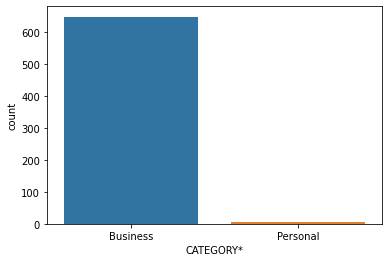

In [26]:
sns.countplot(x='CATEGORY*',data=data)

## How long do people travel with Uber 

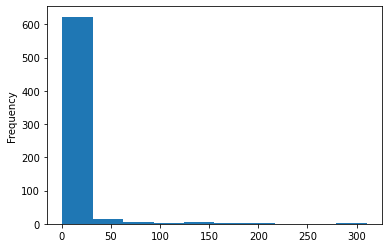

In [27]:
data['MILES*'].plot.hist()

## What hour do most people take uber to their destination?

Text(0.5, 1.0, 'Number of Trips Vs Hours')

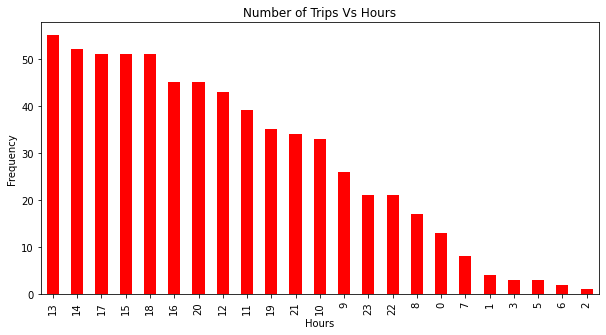

In [28]:
hours=data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar',color='red',figsize=(10,5))

plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of Trips Vs Hours')

# Check the purpose of Trips

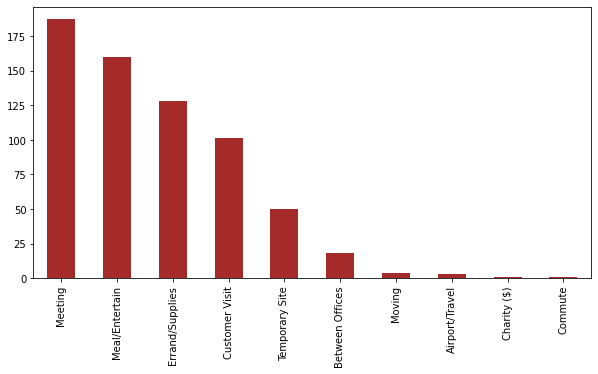

In [29]:
data['PURPOSE*'].value_counts().plot(kind='bar',figsize=(10,5),color='brown')

## Which Day Has The Highest Number Of Trips

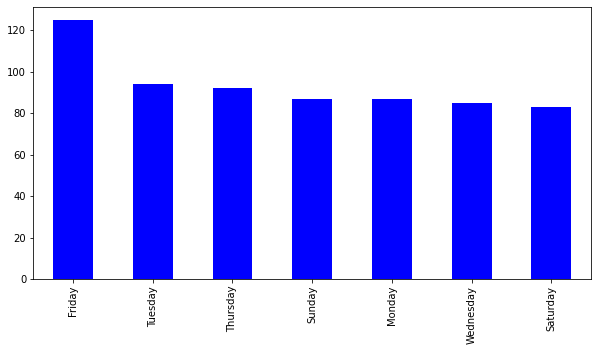

In [31]:
data['WEEKDAY'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

## What Are The Number Of Trips Per Each Day?

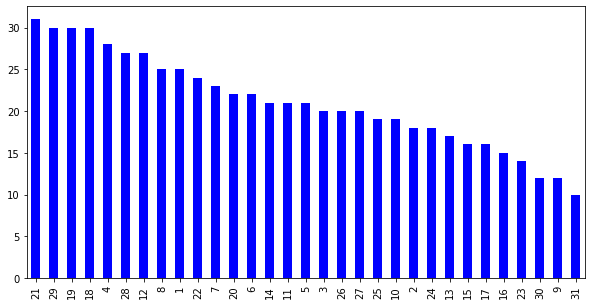

In [32]:
data['DAY'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

# What Are The Trips In The Month?

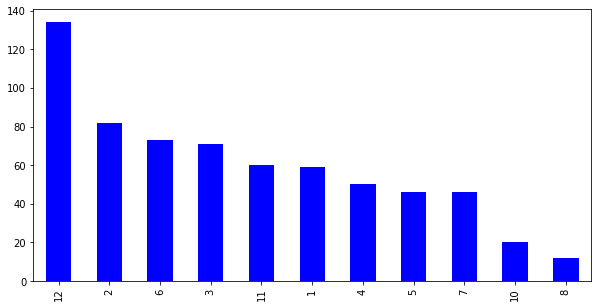

In [33]:
data['MONTH'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

# The starting points of trips. Where Do People Start Boarding Their Trip From Most?

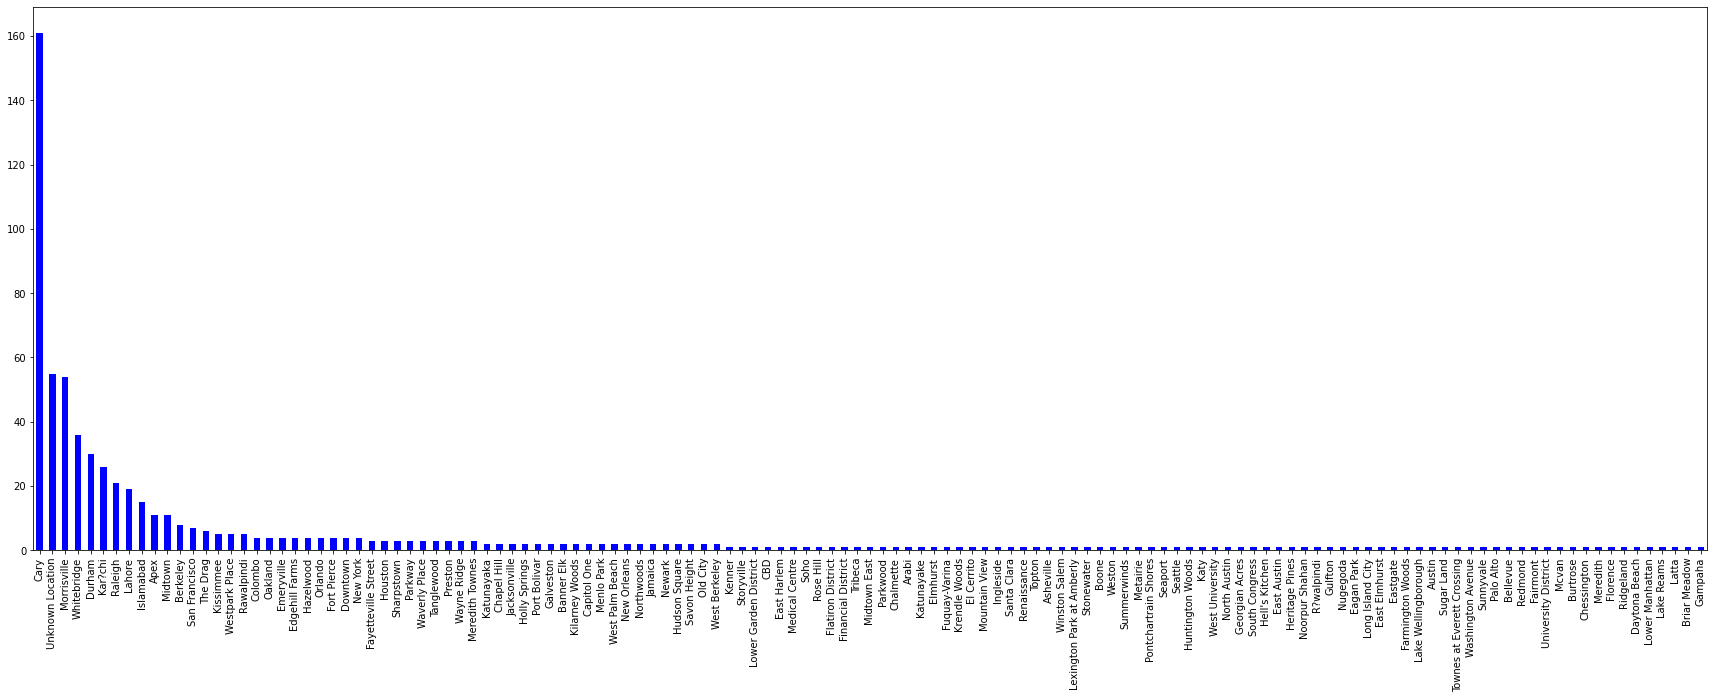

In [40]:
data['START*'].value_counts().plot(kind='bar',figsize=(30,10),color='blue')